Proyecto Monitoreo de datos por 4 días

Analisis del 8 al 11 de febrero

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ch4co8 = pd.read_csv("https://api.thingspeak.com/channels/2378137/feeds.csv?start=2024-02-08offset=UTC-06:00&end=2024-02-12offset=UTC-06:00")
temphum8 = pd.read_csv("https://api.thingspeak.com/channels/1935500/feeds.csv?start=2024-02-08offset=UTC-06:00&end=2024-02-12offset=UTC-06:00")

In [79]:
ch4co8.head()

,created_at,entry_id,field1,field2,field3,field4,field5,field6
0,2024-02-08 06:00:39 UTC,9316,0.0,188.87,15.56,400.0,NaN,NaN
1,2024-02-08 06:01:32 UTC,9317,0.0,137.55,16.55,400.0,NaN,NaN
2,2024-02-08 06:02:23 UTC,9318,0.0,382.58,19.30,400.0,NaN,NaN
3,2024-02-08 06:03:14 UTC,9319,0.0,456.43,18.31,400.0,NaN,NaN
4,2024-02-08 06:04:05 UTC,9320,0.0,519.29,19.00,400.0,NaN,NaN


In [ ]:
ch4co8.tail()

In [4]:
ch4co8.drop(columns=['entry_id','field1','field4', 'field5', 'field6'],inplace=True)
ch4co8.rename(columns={'field2':'Metano', 'field3': 'Monoxido'}, inplace=True)
temphum8.drop(columns=['entry_id','field4', 'field5', 'field6'],inplace=True)
temphum8.rename(columns={'field1':'Humedad', 'field2': 'Temperatura', 'field3': 'CO2'}, inplace=True)

In [ ]:
print("La descripción detallada de las variables metano y monóxido: \n")
print(round(ch4co8.describe()))
print("La descripción detallada de las variables humedad, temperatura y co2: \n")
print(round(temphum8.describe()))

In [ ]:
gr1 = sns.displot(data=ch4co8, x="Metano", kde=True)
gr1.set_axis_labels("Metano", "Conteo de mediciones")
plt.show()
sns.displot(data=ch4co8, x="Monoxido", kde=True)   
plt.show() 
sns.displot(data=temphum8, x="Humedad", kde=True)
plt.show()
sns.displot(data=temphum8, x="Temperatura", kde=True)   
plt.show() 
sns.displot(data=temphum8, x="CO2", kde=True)   
plt.show() 

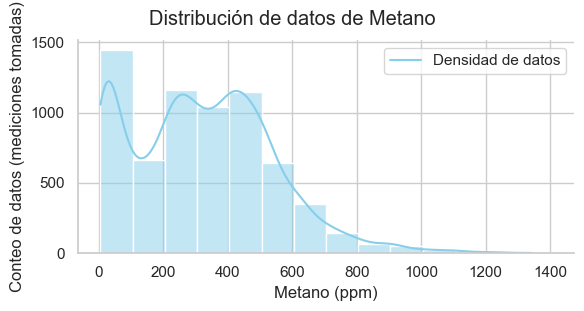

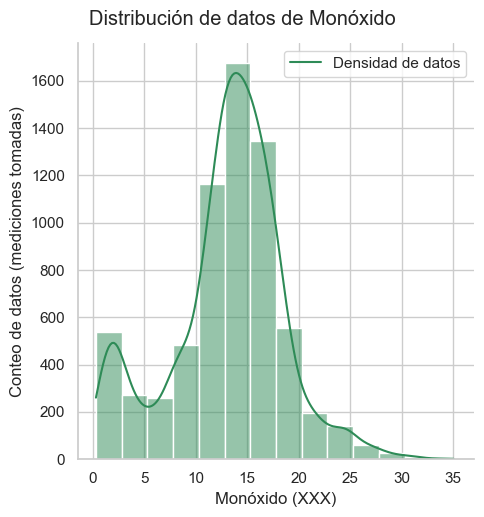

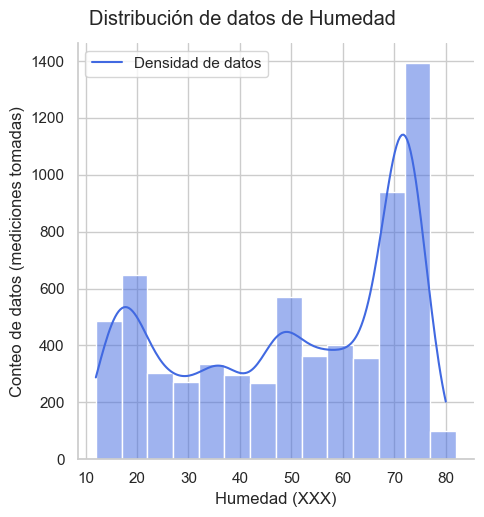

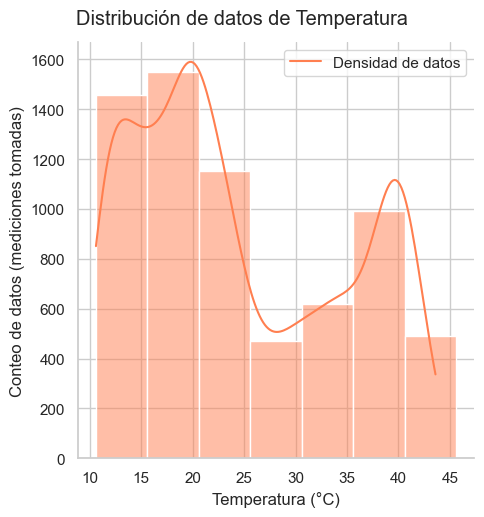

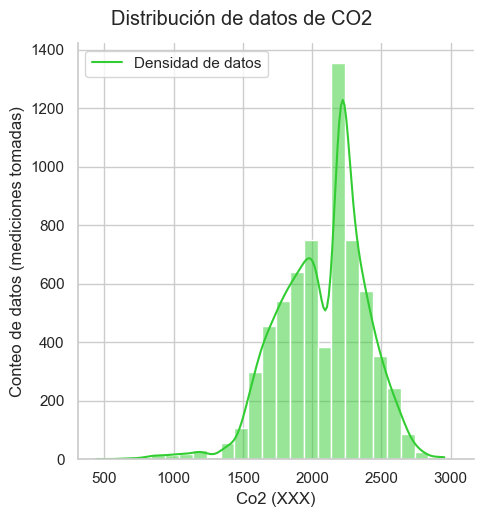

In [76]:
sns.set_style(style="whitegrid")
met1 = sns.displot(data=ch4co8, x="Metano",binwidth=100, kde=True, color='skyblue', height=3, aspect=2)
met1.set_axis_labels("Metano (ppm)", "Conteo de datos (mediciones tomadas)")
met1.figure.suptitle('Distribución de datos de Metano', y=1.03)  
plt.legend(['Densidad de datos'])
plt.show()
#met1.savefig("metano_distribucion.png", dpi=300)  # Ajusta el dpi para cambiar la calidad de la imagen

mon1 = sns.displot(data=ch4co8, x="Monoxido",binwidth=2.5, kde=True, color='seagreen')
mon1.set_axis_labels("Monóxido (XXX)", "Conteo de datos (mediciones tomadas)")
mon1.figure.suptitle('Distribución de datos de Monóxido', y=1.03)  
plt.legend(['Densidad de datos'])
plt.show()

hum1 = sns.displot(data=temphum8, x="Humedad",binwidth=5, kde=True, color='royalblue')
hum1.set_axis_labels("Humedad (XXX)", "Conteo de datos (mediciones tomadas)")
hum1.figure.suptitle('Distribución de datos de Humedad', y=1.03)  
plt.legend(['Densidad de datos'])
plt.show()

temp1 = sns.displot(data=temphum8, x="Temperatura",binwidth=5, kde=True, color='coral')
temp1.set_axis_labels("Temperatura (°C)", "Conteo de datos (mediciones tomadas)")
temp1.figure.suptitle('Distribución de datos de Temperatura', y=1.03)  
plt.legend(['Densidad de datos'])
plt.show()

co2 = sns.displot(data=temphum8, x="CO2",binwidth=100, kde=True, color='limegreen')
co2.set_axis_labels("Co2 (XXX)", "Conteo de datos (mediciones tomadas)")
co2.figure.suptitle('Distribución de datos de CO2', y=1.03)  
plt.legend(['Densidad de datos'])
plt.show()

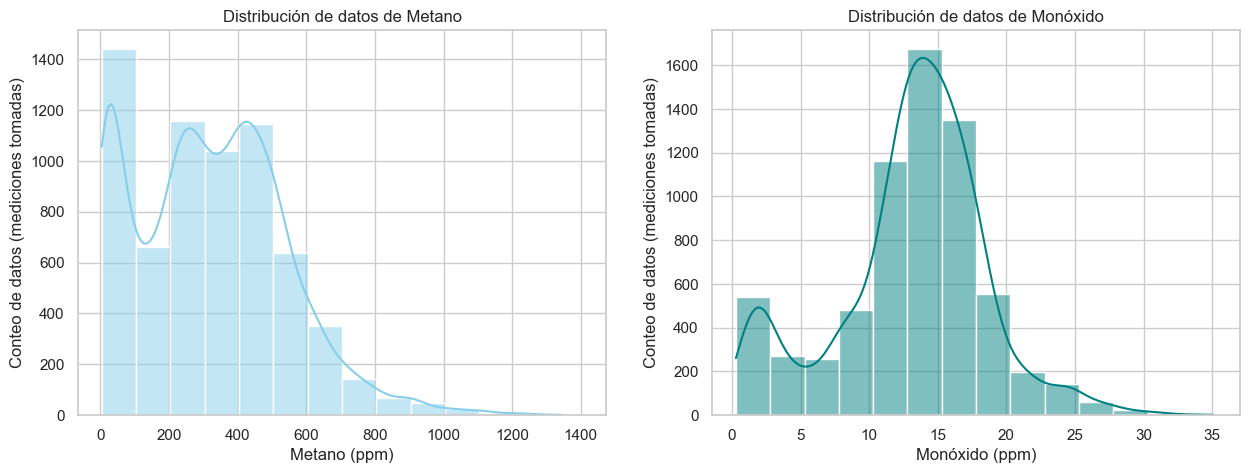

In [77]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=ch4co8, x="Metano", binwidth=100, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de datos de Metano')
axes[0].set_xlabel("Metano (ppm)")
axes[0].set_ylabel("Conteo de datos (mediciones tomadas)")

# Gráfica de Monóxido
sns.histplot(data=ch4co8, x="Monoxido", binwidth=2.5, kde=True, color='teal', ax=axes[1])
axes[1].set_title('Distribución de datos de Monóxido')
axes[1].set_xlabel("Monóxido (ppm)")
axes[1].set_ylabel("Conteo de datos (mediciones tomadas)")

plt.tight_layout()
plt.show()

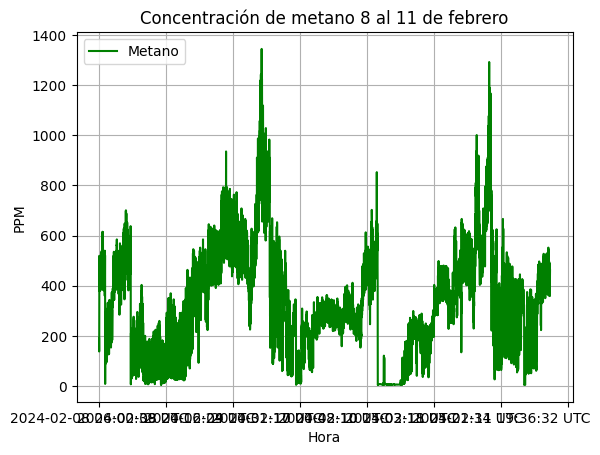

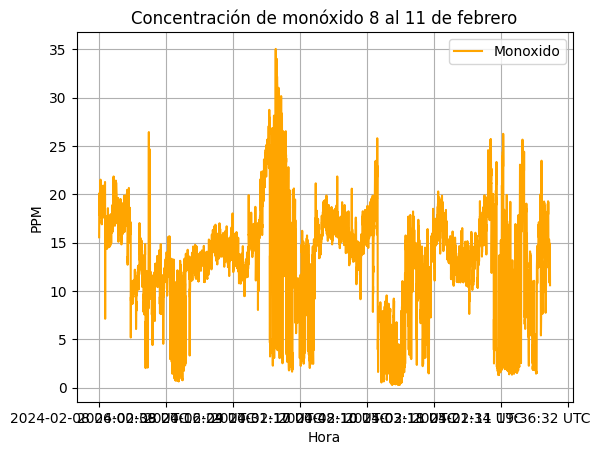

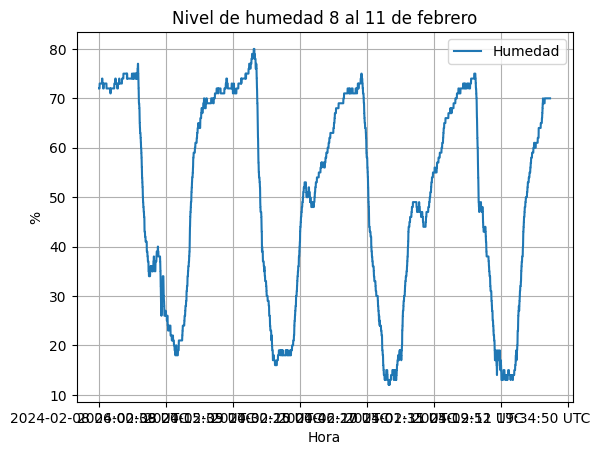

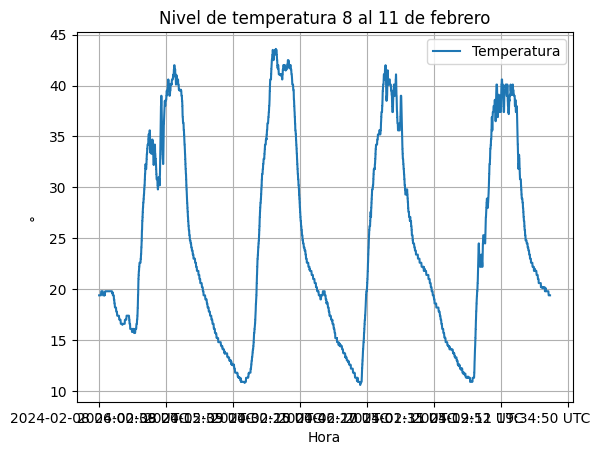

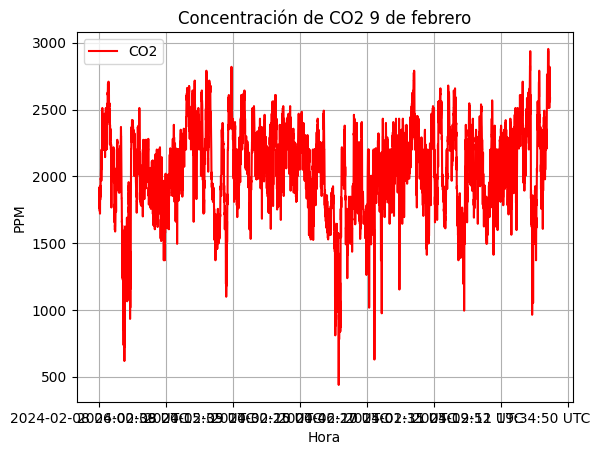

In [8]:
ch408 = ch4co8[["created_at","Metano"]]
ax = ch408.plot (x="created_at", y="Metano", rot=0, color='green')
plt.title('Concentración de metano 8 al 11 de febrero')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

co08 = ch4co8[["created_at","Monoxido"]]
ax = co08.plot (x="created_at", y="Monoxido", rot=0, color='orange')
plt.title('Concentración de monóxido 8 al 11 de febrero')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

hu08 = temphum8[["created_at","Humedad"]]
ax = hu08.plot (x="created_at", y="Humedad", rot=0)
plt.title('Nivel de humedad 8 al 11 de febrero')
plt.xlabel('Hora')
plt.ylabel('%')
ax.grid()
plt.show()

te08 = temphum8[["created_at","Temperatura"]]
ax = te08.plot (x="created_at", y="Temperatura", rot=0)
plt.title('Nivel de temperatura 8 al 11 de febrero')
plt.xlabel('Hora')
plt.ylabel('°')
ax.grid()
plt.show()

co08 = temphum8[["created_at","CO2"]]
ax = co08.plot (x="created_at", y="CO2", rot=0, color='red')
plt.title('Concentración de CO2 9 de febrero')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

Analisis 12 al 15 de febrero 

In [4]:
ch4co815 = pd.read_csv("https://api.thingspeak.com/channels/2378137/feeds.csv?start=2024-02-12offset=UTC-06:00&end=2024-02-16offset=UTC-06:00")
temphum815 = pd.read_csv("https://api.thingspeak.com/channels/1935500/feeds.csv?start=2024-02-12offset=UTC-06:00&end=2024-02-16offset=UTC-06:00")

In [5]:
ch4co815.drop(columns=['entry_id','field1','field4', 'field5', 'field6'],inplace=True)
ch4co815.rename(columns={'field2':'Metano', 'field3': 'Monoxido'}, inplace=True)
temphum815.drop(columns=['entry_id','field4', 'field5', 'field6'],inplace=True)
temphum815.rename(columns={'field1':'Humedad', 'field2': 'Temperatura', 'field3': 'CO2'}, inplace=True)

In [10]:
print("La descripción detallada de las variables metano y monóxido: \n")
print(round(ch4co815.describe()))
print("La descripción detallada de las variables humedad, temperatura y co2: \n")
print(round(temphum815.describe()))

La descripción detallada de las variables metano y monóxido: 

       Metano  Monoxido
count  6733.0    6733.0
mean    401.0      13.0
std     150.0       7.0
min      22.0       1.0
25%     308.0       6.0
50%     404.0      14.0
75%     498.0      18.0
max     987.0      30.0
La descripción detallada de las variables humedad, temperatura y co2: 

       Humedad  Temperatura     CO2
count   6734.0       6734.0  6735.0
mean      48.0         24.0  2142.0
std       19.0          8.0   511.0
min       12.0         14.0   400.0
25%       32.0         18.0  1814.0
50%       48.0         22.0  2201.0
75%       64.0         29.0  2469.0
max       77.0         44.0  3893.0


c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


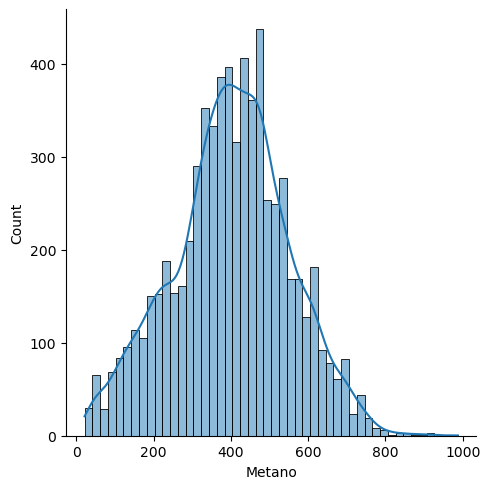

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


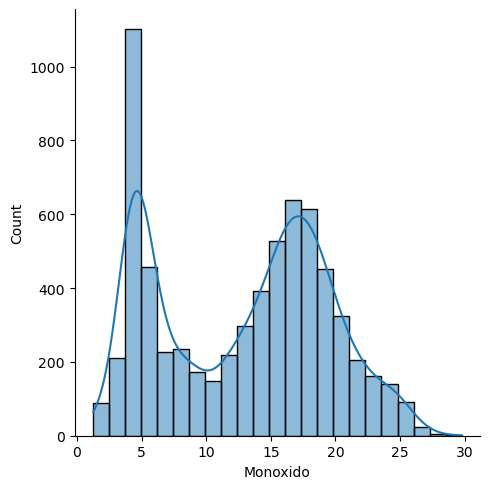

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


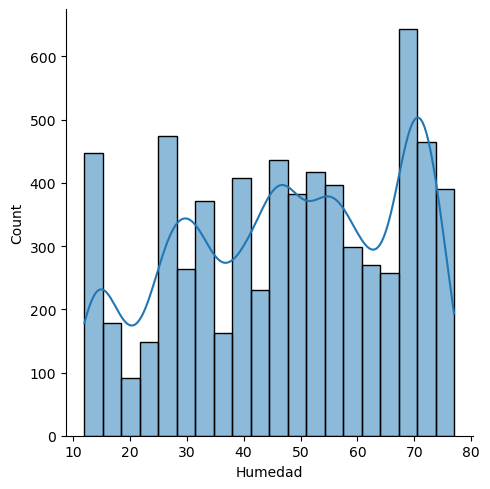

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


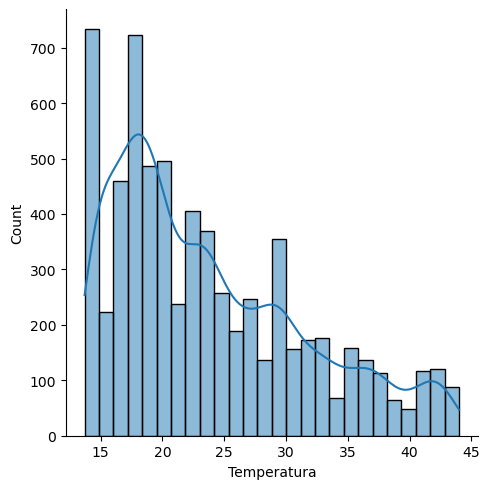

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


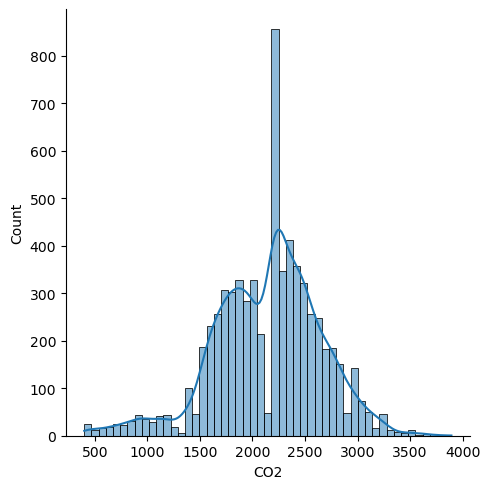

In [11]:
sns.displot(data=ch4co815, x="Metano",kde=True)
plt.show()
sns.displot(data=ch4co815, x="Monoxido",kde=True)   
plt.show() 
sns.displot(data=temphum815, x="Humedad",kde=True)
plt.show()
sns.displot(data=temphum815, x="Temperatura",kde=True)   
plt.show() 
sns.displot(data=temphum815, x="CO2",kde=True)   
plt.show() 

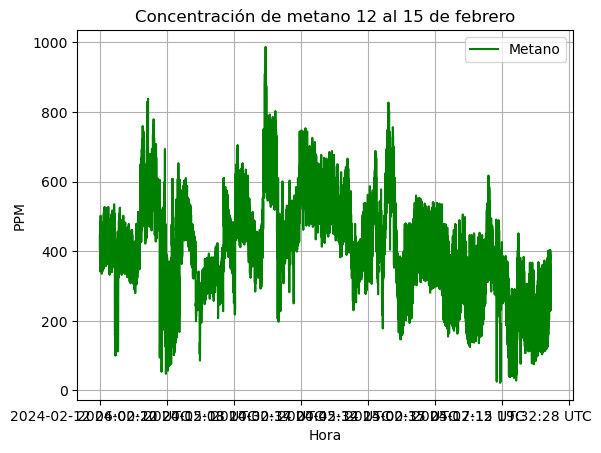

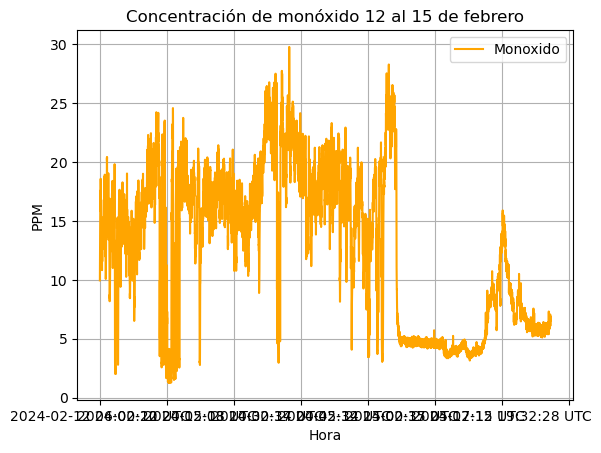

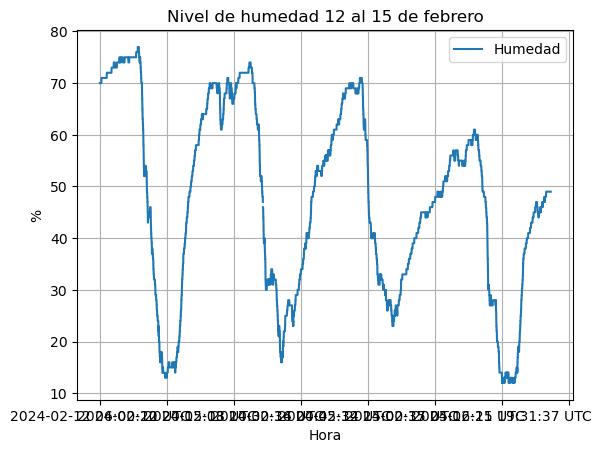

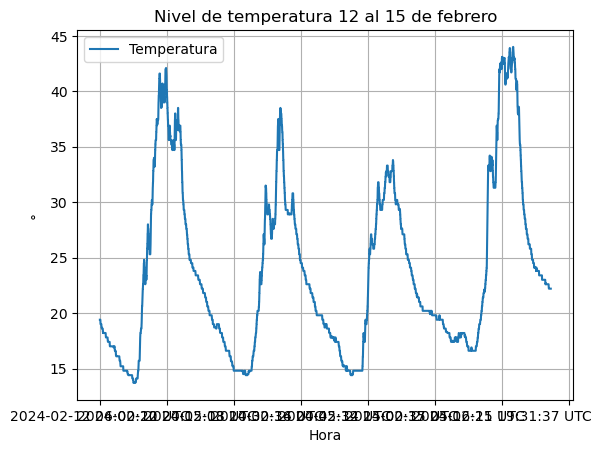

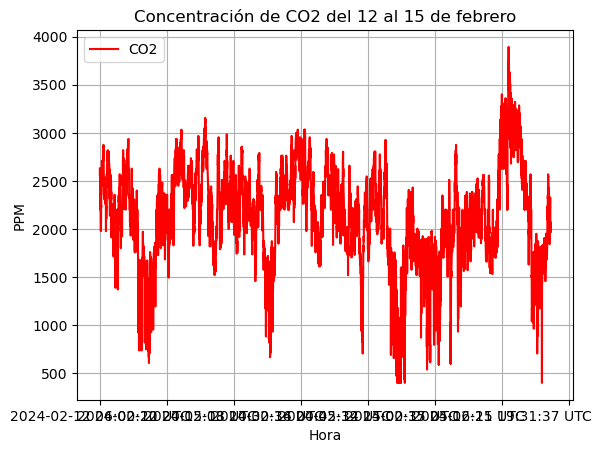

In [21]:
ch415 = ch4co815[["created_at","Metano"]]
ax = ch415.plot (x="created_at", y="Metano", rot=0, color='green')
plt.title('Concentración de metano 12 al 15 de febrero')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

co15 = ch4co815[["created_at","Monoxido"]]
ax = co15.plot (x="created_at", y="Monoxido", rot=0, color='orange')
plt.title('Concentración de monóxido 12 al 15 de febrero')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

hu15 = temphum815[["created_at","Humedad"]]
ax = hu15.plot (x="created_at", y="Humedad", rot=0)
plt.title('Nivel de humedad 12 al 15 de febrero')
plt.xlabel('Hora')
plt.ylabel('%')
ax.grid()
plt.show()

te15 = temphum815[["created_at","Temperatura"]]
ax = te15.plot (x="created_at", y="Temperatura", rot=0)
plt.title('Nivel de temperatura 12 al 15 de febrero')
plt.xlabel('Hora')
plt.ylabel('°')
ax.grid()
plt.show()

co15 = temphum815[["created_at","CO2"]]
ax = co15.plot (x="created_at", y="CO2", rot=0, color='red')
plt.title('Concentración de CO2 del 12 al 15 de febrero')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

Análisis del 16 al 19 de febrero 

In [8]:
ch4co19 = pd.read_csv("https://api.thingspeak.com/channels/2378137/feeds.csv?start=2024-02-16offset=UTC-06:00&end=2024-02-20offset=UTC-06:00")
temphum19 = pd.read_csv("https://api.thingspeak.com/channels/1935500/feeds.csv?start=2024-02-16offset=UTC-06:00&end=2024-02-20offset=UTC-06:00")

In [9]:
ch4co19.drop(columns=['entry_id','field1','field4', 'field5', 'field6'],inplace=True)
ch4co19.rename(columns={'field2':'Metano', 'field3': 'Monoxido'}, inplace=True)
temphum19.drop(columns=['entry_id','field4', 'field5', 'field6'],inplace=True)
temphum19.rename(columns={'field1':'Humedad', 'field2': 'Temperatura', 'field3': 'CO2'}, inplace=True)

In [15]:
print("La descripción detallada de las variables metano y monóxido: \n")
print(round(ch4co19.describe()))
print("La descripción detallada de las variables humedad, temperatura y co2: \n")
print(round(temphum19.describe()))

La descripción detallada de las variables metano y monóxido: 

       Metano  Monoxido
count  6735.0    6735.0
mean    214.0       6.0
std     111.0       2.0
min      49.0       2.0
25%     120.0       4.0
50%     183.0       5.0
75%     300.0       7.0
max     650.0      14.0
La descripción detallada de las variables humedad, temperatura y co2: 

       Humedad  Temperatura     CO2
count   6736.0       6736.0  6737.0
mean      56.0         22.0  2611.0
std       24.0         10.0   758.0
min        9.0         10.0   400.0
25%       36.0         15.0  2114.0
50%       68.0         19.0  2450.0
75%       77.0         29.0  3057.0
max       81.0         45.0  4563.0


c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


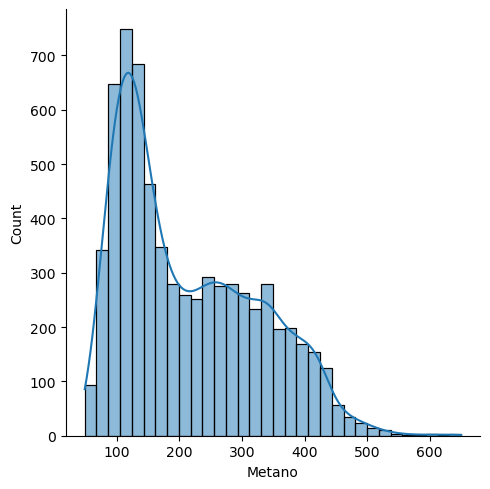

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


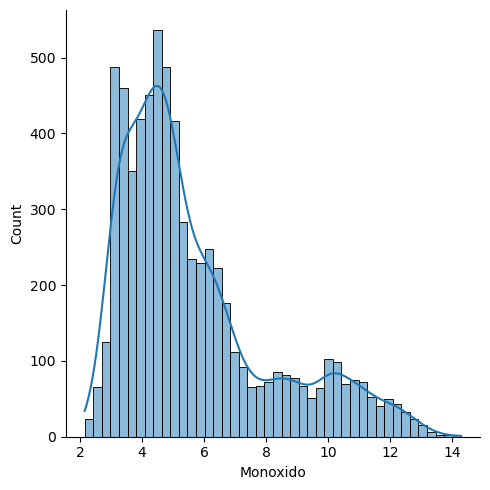

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


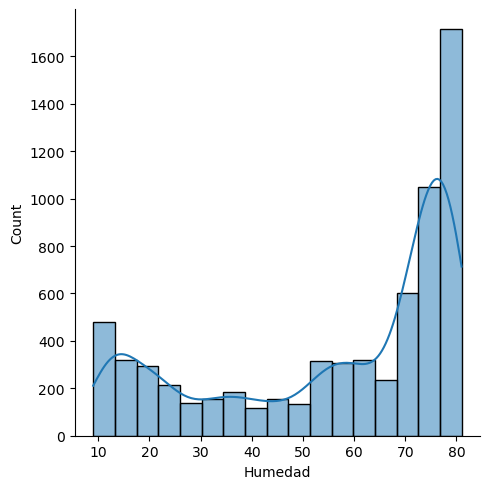

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


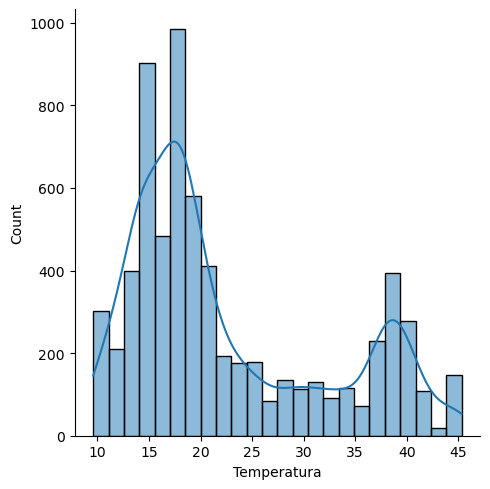

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


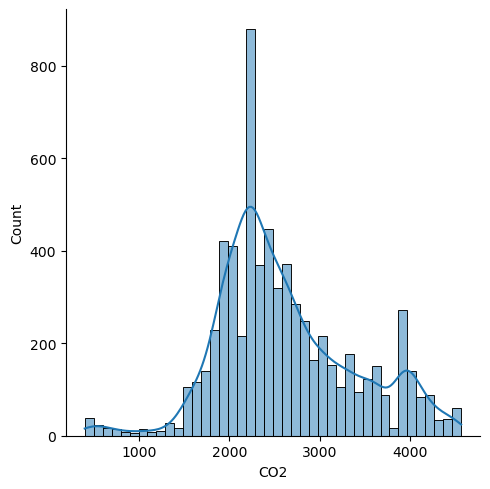

In [16]:
sns.displot(data=ch4co19, x="Metano",kde=True)
plt.show()
sns.displot(data=ch4co19, x="Monoxido",kde=True)   
plt.show() 
sns.displot(data=temphum19, x="Humedad",kde=True)
plt.show()
sns.displot(data=temphum19, x="Temperatura",kde=True)   
plt.show() 
sns.displot(data=temphum19, x="CO2",kde=True)   
plt.show() 

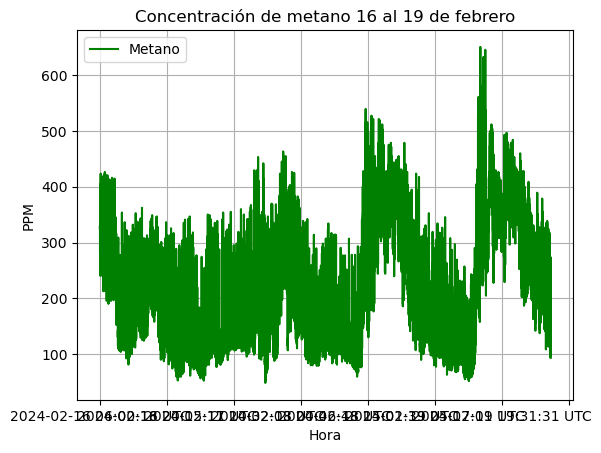

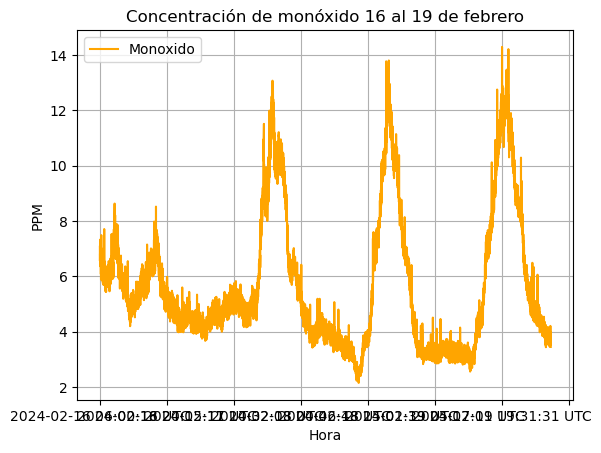

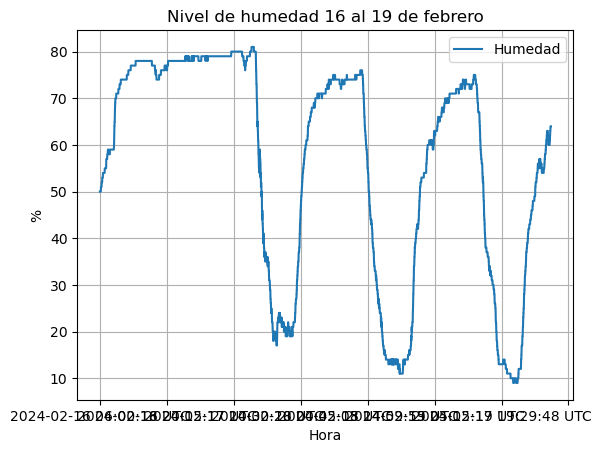

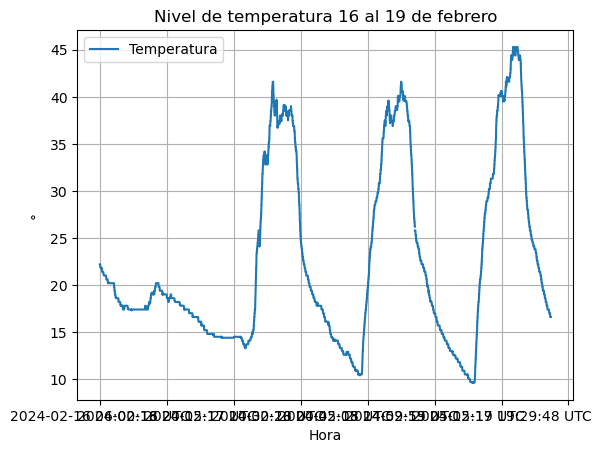

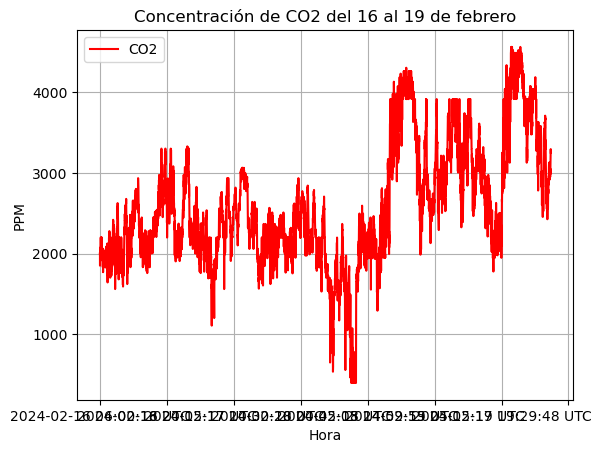

In [22]:
ch419 = ch4co19[["created_at","Metano"]]
ax = ch419.plot (x="created_at", y="Metano", rot=0, color='green')
plt.title('Concentración de metano 16 al 19 de febrero')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

co19 = ch4co19[["created_at","Monoxido"]]
ax = co19.plot (x="created_at", y="Monoxido", rot=0, color='orange')
plt.title('Concentración de monóxido 16 al 19 de febrero')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

hu19 = temphum19[["created_at","Humedad"]]
ax = hu19.plot (x="created_at", y="Humedad", rot=0)
plt.title('Nivel de humedad 16 al 19 de febrero')
plt.xlabel('Hora')
plt.ylabel('%')
ax.grid()
plt.show()

te19 = temphum19[["created_at","Temperatura"]]
ax = te19.plot (x="created_at", y="Temperatura", rot=0)
plt.title('Nivel de temperatura 16 al 19 de febrero')
plt.xlabel('Hora')
plt.ylabel('°')
ax.grid()
plt.show()

co19 = temphum19[["created_at","CO2"]]
ax = co19.plot (x="created_at", y="CO2", rot=0, color='red')
plt.title('Concentración de CO2 del 16 al 19 de febrero')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

Análisis del 20 al 23 de febrero 

In [11]:
ch4co23 = pd.read_csv("https://api.thingspeak.com/channels/2378137/feeds.csv?start=2024-02-20offset=UTC-06:00&end=2024-02-24offset=UTC-06:00")
temphum23 = pd.read_csv("https://api.thingspeak.com/channels/1935500/feeds.csv?start=2024-02-20offset=UTC-06:00&end=2024-02-24offset=UTC-06:00")

In [12]:
ch4co23.drop(columns=['entry_id','field1','field4', 'field5', 'field6'],inplace=True)
ch4co23.rename(columns={'field2':'Metano', 'field3': 'Monoxido'}, inplace=True)
temphum23.drop(columns=['entry_id','field4', 'field5', 'field6'],inplace=True)
temphum23.rename(columns={'field1':'Humedad', 'field2': 'Temperatura', 'field3': 'CO2'}, inplace=True)

In [20]:
print("La descripción detallada de las variables metano y monóxido: \n")
print(round(ch4co23.describe()))
print("La descripción detallada de las variables humedad, temperatura y co2: \n")
print(round(temphum23.describe()))

La descripción detallada de las variables metano y monóxido: 

       Metano  Monoxido
count  6723.0    6723.0
mean    219.0       6.0
std     128.0       4.0
min      47.0       2.0
25%     107.0       3.0
50%     190.0       4.0
75%     305.0       8.0
max     627.0      20.0
La descripción detallada de las variables humedad, temperatura y co2: 

       Humedad  Temperatura     CO2
count   6732.0       6732.0  6735.0
mean      46.0         26.0  2585.0
std       25.0         12.0   820.0
min        8.0          9.0   548.0
25%       18.0         15.0  1926.0
50%       54.0         24.0  2469.0
75%       70.0         40.0  3138.0
max       75.0         48.0  5454.0


c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


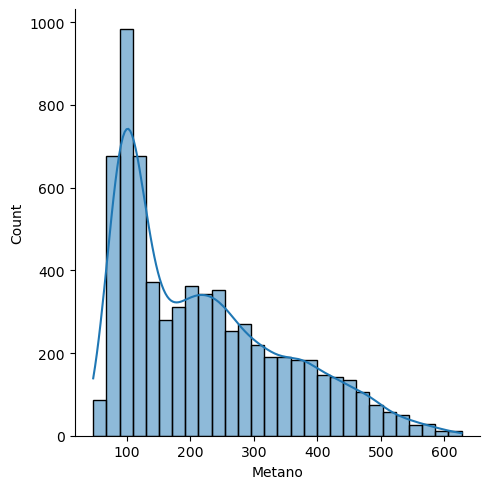

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


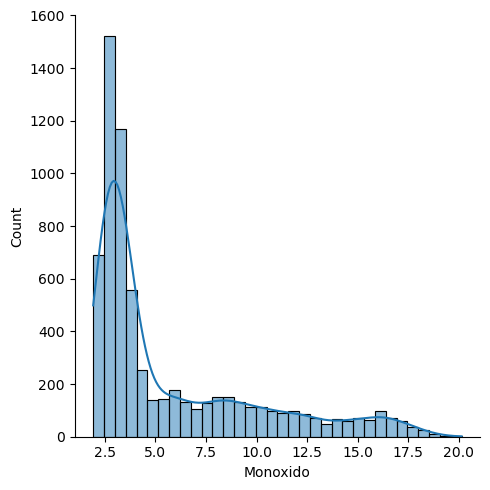

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


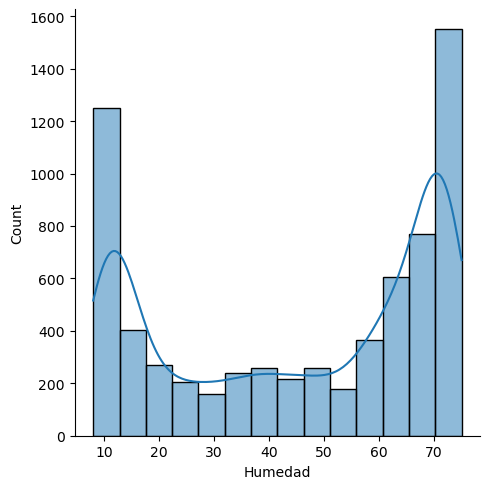

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


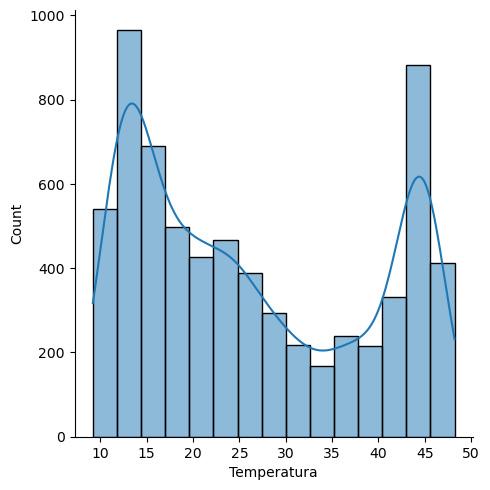

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


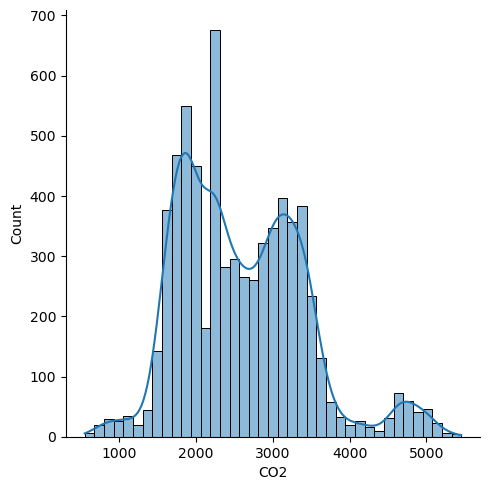

In [21]:
sns.displot(data=ch4co23, x="Metano",kde=True)
plt.show()
sns.displot(data=ch4co23, x="Monoxido",kde=True)   
plt.show() 
sns.displot(data=temphum23, x="Humedad",kde=True)
plt.show()
sns.displot(data=temphum23, x="Temperatura",kde=True)   
plt.show() 
sns.displot(data=temphum23, x="CO2",kde=True)   
plt.show() 

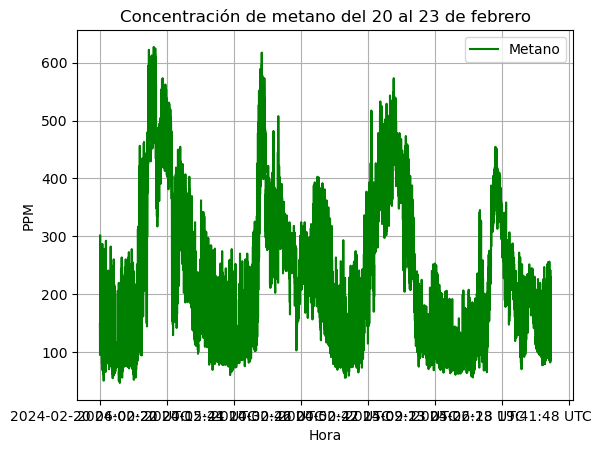

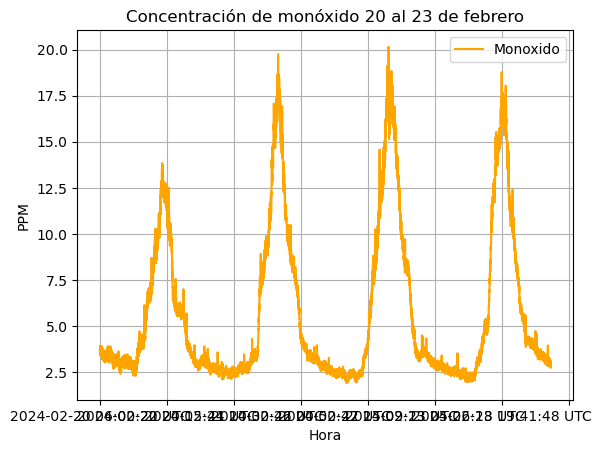

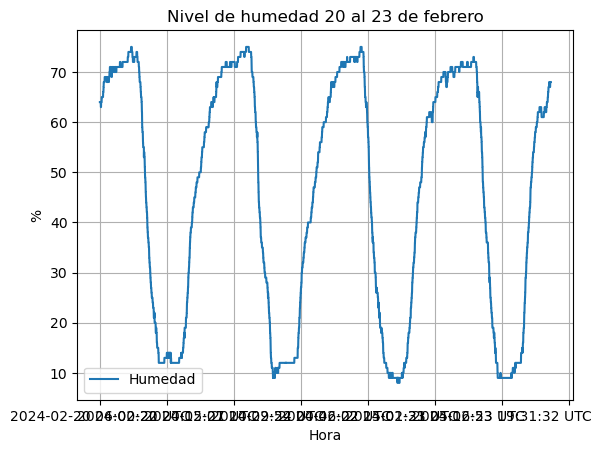

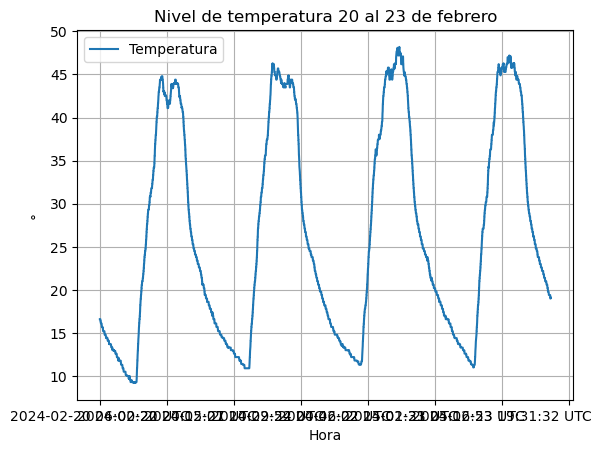

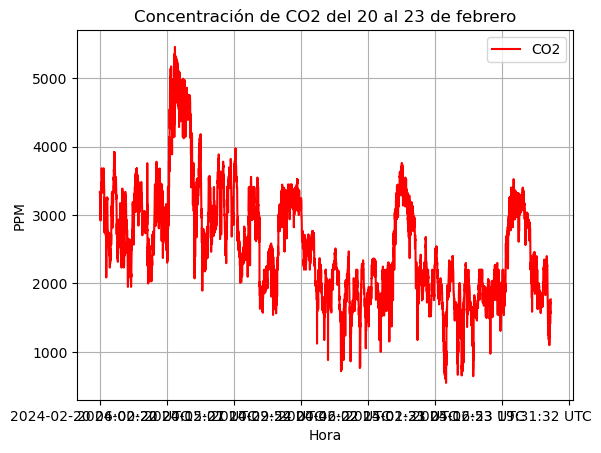

In [23]:
ch423 = ch4co23[["created_at","Metano"]]
ax = ch423.plot (x="created_at", y="Metano", rot=0, color='green')
plt.title('Concentración de metano del 20 al 23 de febrero')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

co23 = ch4co23[["created_at","Monoxido"]]
ax = co23.plot (x="created_at", y="Monoxido", rot=0, color='orange')
plt.title('Concentración de monóxido 20 al 23 de febrero')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

hu23 = temphum23[["created_at","Humedad"]]
ax = hu23.plot (x="created_at", y="Humedad", rot=0)
plt.title('Nivel de humedad 20 al 23 de febrero')
plt.xlabel('Hora')
plt.ylabel('%')
ax.grid()
plt.show()

te23 = temphum23[["created_at","Temperatura"]]
ax = te23.plot (x="created_at", y="Temperatura", rot=0)
plt.title('Nivel de temperatura 20 al 23 de febrero')
plt.xlabel('Hora')
plt.ylabel('°')
ax.grid()
plt.show()

co23 = temphum23[["created_at","CO2"]]
ax = co23.plot (x="created_at", y="CO2", rot=0, color='red')
plt.title('Concentración de CO2 del 20 al 23 de febrero')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

Análisis el 24 al 27 de febrero 

In [14]:
ch4co27 = pd.read_csv("https://api.thingspeak.com/channels/2378137/feeds.csv?start=2024-02-24offset=UTC-06:00&end=2024-02-28offset=UTC-06:00")
temphum27 = pd.read_csv("https://api.thingspeak.com/channels/1935500/feeds.csv?start=2024-02-24offset=UTC-06:00&end=2024-02-28offset=UTC-06:00")

In [15]:
ch4co27.drop(columns=['entry_id','field1','field4', 'field5', 'field6'],inplace=True)
ch4co27.rename(columns={'field2':'Metano', 'field3': 'Monoxido'}, inplace=True)
temphum27.drop(columns=['entry_id','field4', 'field5', 'field6'],inplace=True)
temphum27.rename(columns={'field1':'Humedad', 'field2': 'Temperatura', 'field3': 'CO2'}, inplace=True)

In [25]:
print("La descripción detallada de las variables metano y monóxido: \n")
print(round(ch4co27.describe()))
print("La descripción detallada de las variables humedad, temperatura y co2: \n")
print(round(temphum27.describe()))

La descripción detallada de las variables metano y monóxido: 

       Metano  Monoxido
count  6734.0    6734.0
mean    227.0       5.0
std     118.0       4.0
min      56.0       2.0
25%     126.0       3.0
50%     195.0       3.0
75%     311.0       7.0
max     630.0      17.0
La descripción detallada de las variables humedad, temperatura y co2: 

       Humedad  Temperatura     CO2
count   6731.0       6731.0  6735.0
mean      51.0         27.0  1993.0
std       23.0         11.0   535.0
min       11.0         12.0   400.0
25%       25.0         17.0  1641.0
50%       62.0         24.0  1938.0
75%       72.0         40.0  2322.0
max       79.0         46.0  3461.0


c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


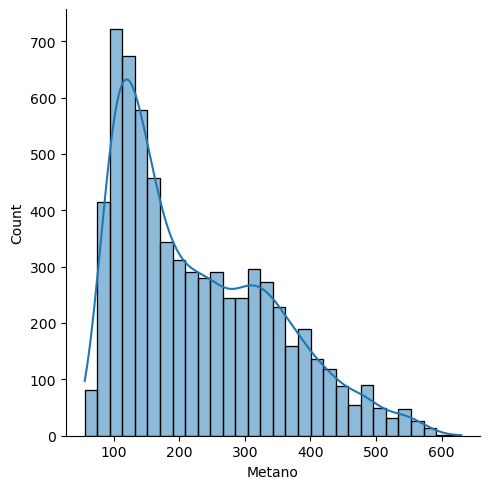

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


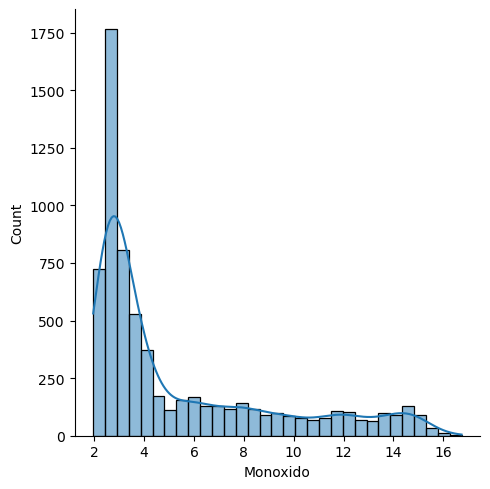

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


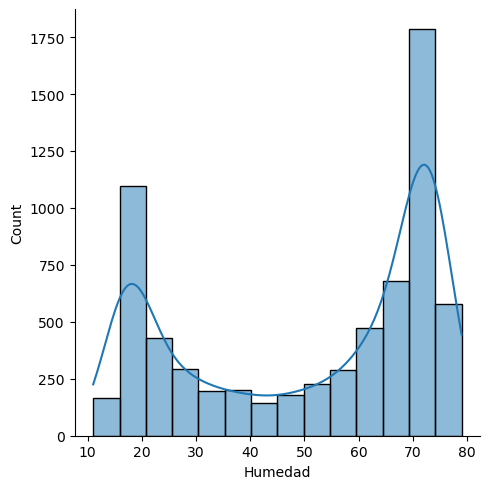

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


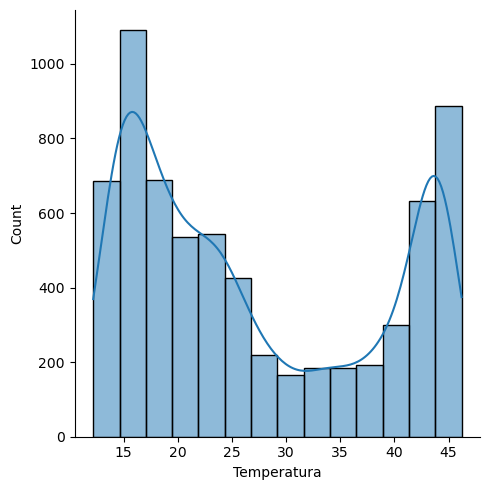

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


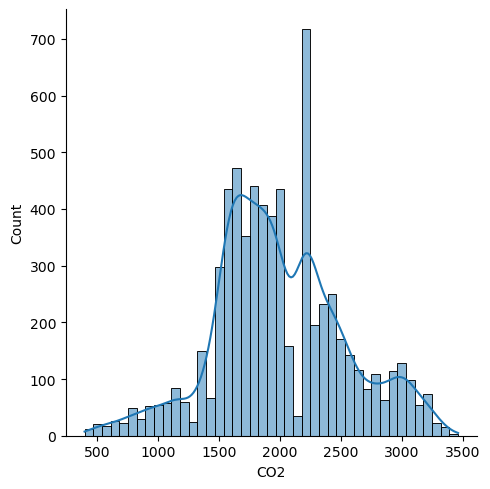

In [26]:
sns.displot(data=ch4co27, x="Metano",kde=True)
plt.show()
sns.displot(data=ch4co27, x="Monoxido",kde=True)   
plt.show() 
sns.displot(data=temphum27, x="Humedad",kde=True)
plt.show()
sns.displot(data=temphum27, x="Temperatura",kde=True)   
plt.show() 
sns.displot(data=temphum27, x="CO2",kde=True)   
plt.show() 

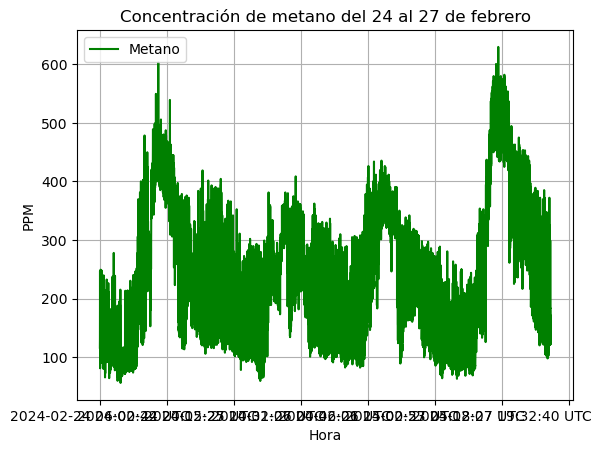

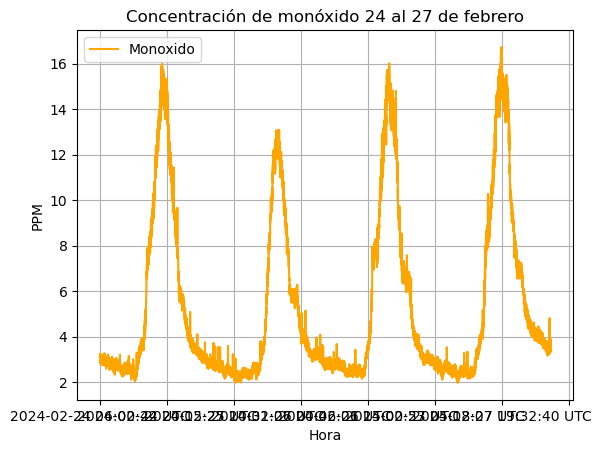

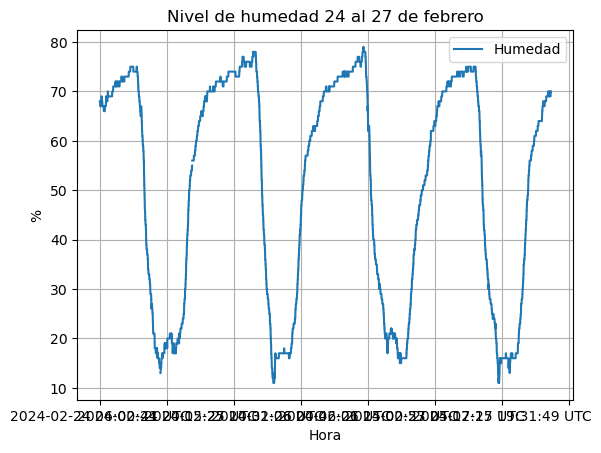

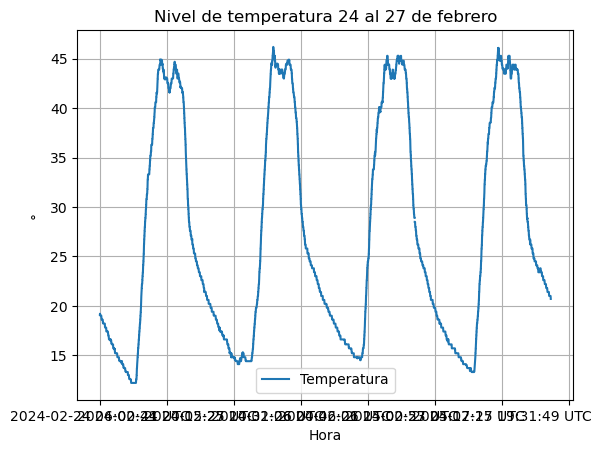

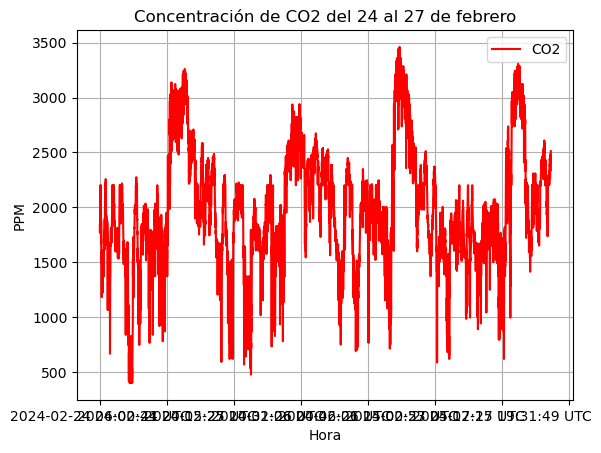

In [24]:
ch427 = ch4co27[["created_at","Metano"]]
ax = ch427.plot (x="created_at", y="Metano", rot=0, color='green')
plt.title('Concentración de metano del 24 al 27 de febrero')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

co27 = ch4co27[["created_at","Monoxido"]]
ax = co27.plot (x="created_at", y="Monoxido", rot=0, color='orange')
plt.title('Concentración de monóxido 24 al 27 de febrero')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

hu27 = temphum27[["created_at","Humedad"]]
ax = hu27.plot (x="created_at", y="Humedad", rot=0)
plt.title('Nivel de humedad 24 al 27 de febrero')
plt.xlabel('Hora')
plt.ylabel('%')
ax.grid()
plt.show()

te27 = temphum27[["created_at","Temperatura"]]
ax = te27.plot (x="created_at", y="Temperatura", rot=0)
plt.title('Nivel de temperatura 24 al 27 de febrero')
plt.xlabel('Hora')
plt.ylabel('°')
ax.grid()
plt.show()

co27 = temphum27[["created_at","CO2"]]
ax = co27.plot (x="created_at", y="CO2", rot=0, color='red')
plt.title('Concentración de CO2 del 24 al 27 de febrero')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

Análisis del 28 de febrero al 2 de marzo 

In [17]:
ch4co03 = pd.read_csv("https://api.thingspeak.com/channels/2378137/feeds.csv?start=2024-02-28offset=UTC-06:00&end=2024-03-03offset=UTC-06:00")
temphum03 = pd.read_csv("https://api.thingspeak.com/channels/1935500/feeds.csv?start=2024-02-28offset=UTC-06:00&end=2024-03-03offset=UTC-06:00")

In [18]:
ch4co03.drop(columns=['entry_id','field1','field4', 'field5', 'field6'],inplace=True)
ch4co03.rename(columns={'field2':'Metano', 'field3': 'Monoxido'}, inplace=True)
temphum03.drop(columns=['entry_id','field4', 'field5', 'field6'],inplace=True)
temphum03.rename(columns={'field1':'Humedad', 'field2': 'Temperatura', 'field3': 'CO2'}, inplace=True)

In [30]:
print("La descripción detallada de las variables metano y monóxido: \n")
print(round(ch4co03.describe()))
print("La descripción detallada de las variables humedad, temperatura y co2: \n")
print(round(temphum03.describe()))

La descripción detallada de las variables metano y monóxido: 

       Metano  Monoxido
count  6732.0    6732.0
mean    220.0       5.0
std     112.0       3.0
min      61.0       2.0
25%     126.0       3.0
50%     184.0       4.0
75%     295.0       7.0
max     650.0      18.0
La descripción detallada de las variables humedad, temperatura y co2: 

       Humedad  Temperatura     CO2
count   6731.0       6731.0  6733.0
mean      47.0         27.0  2482.0
std       25.0         12.0   929.0
min        8.0         10.0   400.0
25%       21.0         17.0  1778.0
50%       53.0         23.0  2421.0
75%       71.0         39.0  2991.0
max       78.0         48.0  5397.0


c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


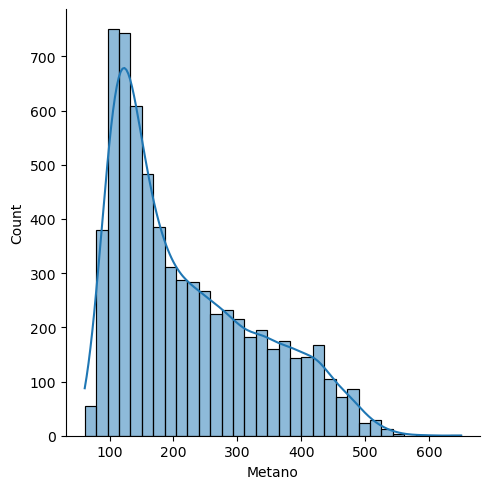

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


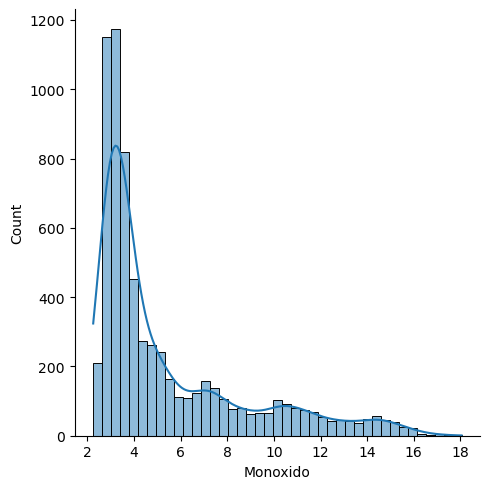

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


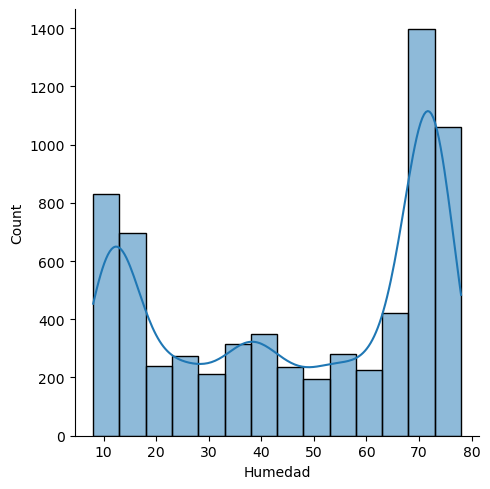

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


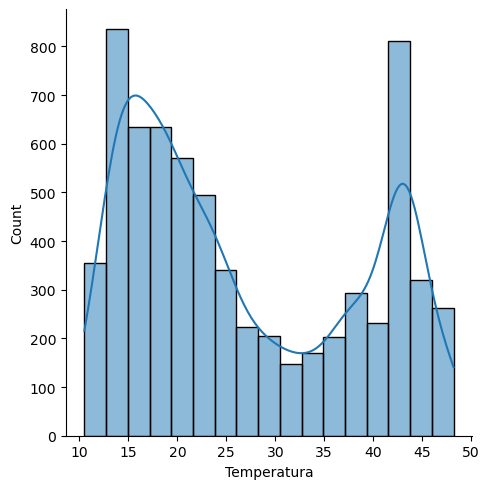

c:\Users\Cynthia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


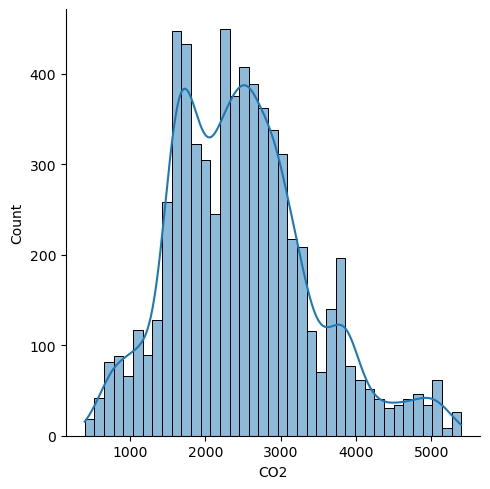

In [31]:
sns.displot(data=ch4co03, x="Metano",kde=True)
plt.show()
sns.displot(data=ch4co03, x="Monoxido",kde=True)   
plt.show() 
sns.displot(data=temphum03, x="Humedad",kde=True)
plt.show()
sns.displot(data=temphum03, x="Temperatura",kde=True)   
plt.show() 
sns.displot(data=temphum03, x="CO2",kde=True)   
plt.show()

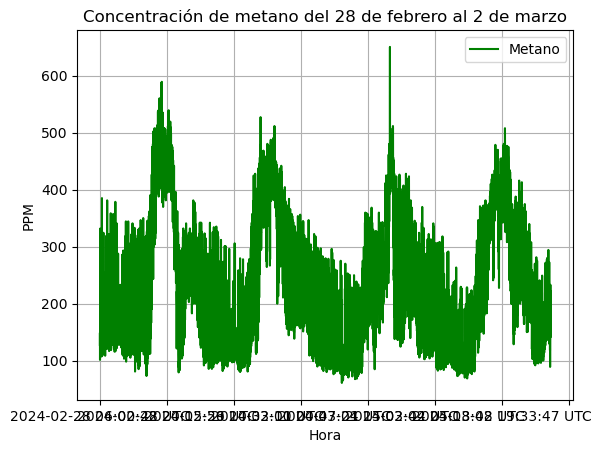

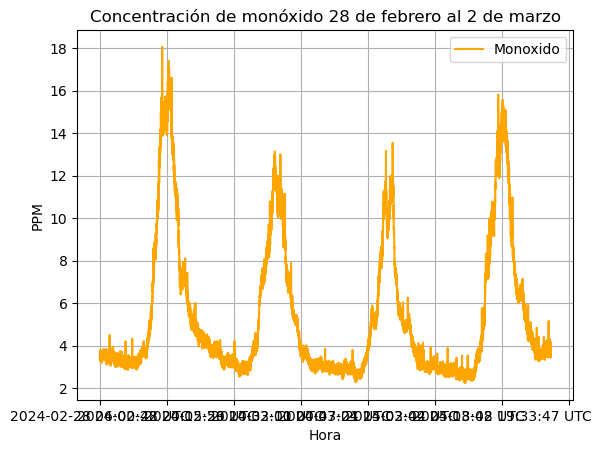

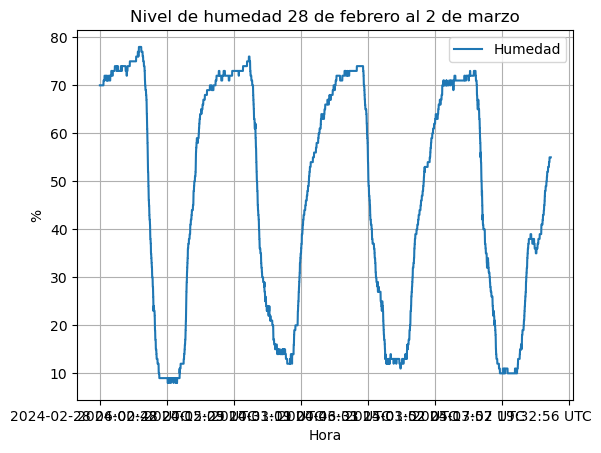

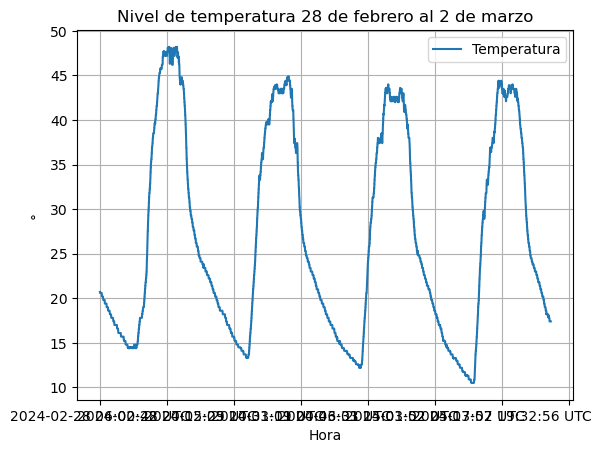

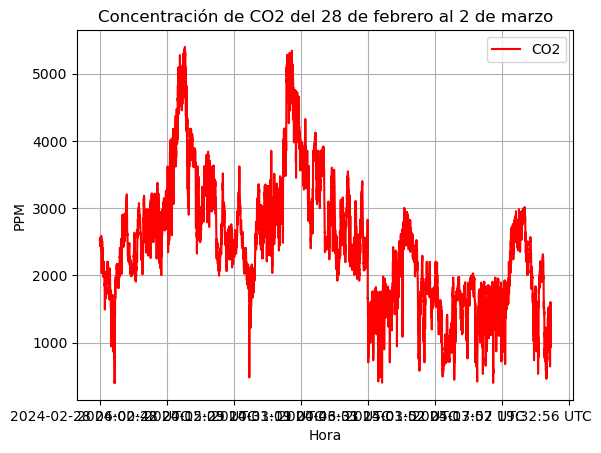

In [25]:
ch403 = ch4co03[["created_at","Metano"]]
ax = ch403.plot (x="created_at", y="Metano", rot=0, color='green')
plt.title('Concentración de metano del 28 de febrero al 2 de marzo')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

co03 = ch4co03[["created_at","Monoxido"]]
ax = co03.plot (x="created_at", y="Monoxido", rot=0, color='orange')
plt.title('Concentración de monóxido 28 de febrero al 2 de marzo')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()

hu03 = temphum03[["created_at","Humedad"]]
ax = hu03.plot (x="created_at", y="Humedad", rot=0)
plt.title('Nivel de humedad 28 de febrero al 2 de marzo')
plt.xlabel('Hora')
plt.ylabel('%')
ax.grid()
plt.show()

te03 = temphum03[["created_at","Temperatura"]]
ax = te03.plot (x="created_at", y="Temperatura", rot=0)
plt.title('Nivel de temperatura 28 de febrero al 2 de marzo')
plt.xlabel('Hora')
plt.ylabel('°')
ax.grid()
plt.show()

co03 = temphum03[["created_at","CO2"]]
ax = co03.plot (x="created_at", y="CO2", rot=0, color='red')
plt.title('Concentración de CO2 del 28 de febrero al 2 de marzo')
plt.xlabel('Hora')
plt.ylabel('PPM')
ax.grid()
plt.show()